In [1]:
import glob
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py
import pandas as pd

In [2]:
pathimg = 'C:/Users/User/Desktop/degree sem 2 2022/TPR2251 - PATTERN RECOGNITION/project2/resize/*.jpg'
filepath = 'C:/Users/User/Desktop/degree sem 2 2022/TPR2251 - PATTERN RECOGNITION/project2/resize/'

In [3]:
img = []
file = h5py.File('C:/Users/User/Desktop/degree sem 2 2022/TPR2251 - PATTERN RECOGNITION/project2/dataset.h5', 'w')

for myfile in glob.glob(pathimg):
    image = cv2.imread(myfile, 0)
    img.append(image)
    
npimages = np.array(img)
npimages = npimages.reshape(npimages.shape[0],10000)

In [4]:
label = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                  2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
                  3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3])

In [5]:
sampleimg = file.create_dataset("sampleimg", data=npimages)
label = file.create_dataset("label", data=label)

In [6]:
file.close()

In [7]:
file = h5py.File("dataset.h5", 'r+')
print(file.keys())

<KeysViewHDF5 ['label', 'sampleimg']>


In [8]:
labelcheck = file.get('label')
print(labelcheck)

samplecheck = file.get('sampleimg')
print(samplecheck)

<HDF5 dataset "label": shape (90,), type "<i4">
<HDF5 dataset "sampleimg": shape (90, 10000), type "|u1">


In [9]:
data = np.array(file['/sampleimg'])
label = np.array(file['/label'])

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    label, 
                                                    test_size=0.4, 
                                                    random_state=42)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(54, 10000)
(54,)
(36, 10000)
(36,)


In [12]:
def image_grid(D,H,W,cols=10,scale=1):
    """ display a grid of images
        H,W: Height and width of the images
        cols: number of columns = number of images in each row
        scale: 1 to fill screen
    """
    n = np.shape(D)[0]
    rows = int(math.ceil((n+0.0)/cols))
    fig = plt.figure(1,figsize=[scale*20.0/H*W,scale*20.0/cols*rows],dpi=300)
    for i in range(n):
        plt.subplot(rows,cols,i+1)
        fig=plt.imshow(np.reshape(D[i,:],[H,W]), cmap = plt.get_cmap("gray"))
        plt.axis('off')

In [13]:
H =100
W= 100

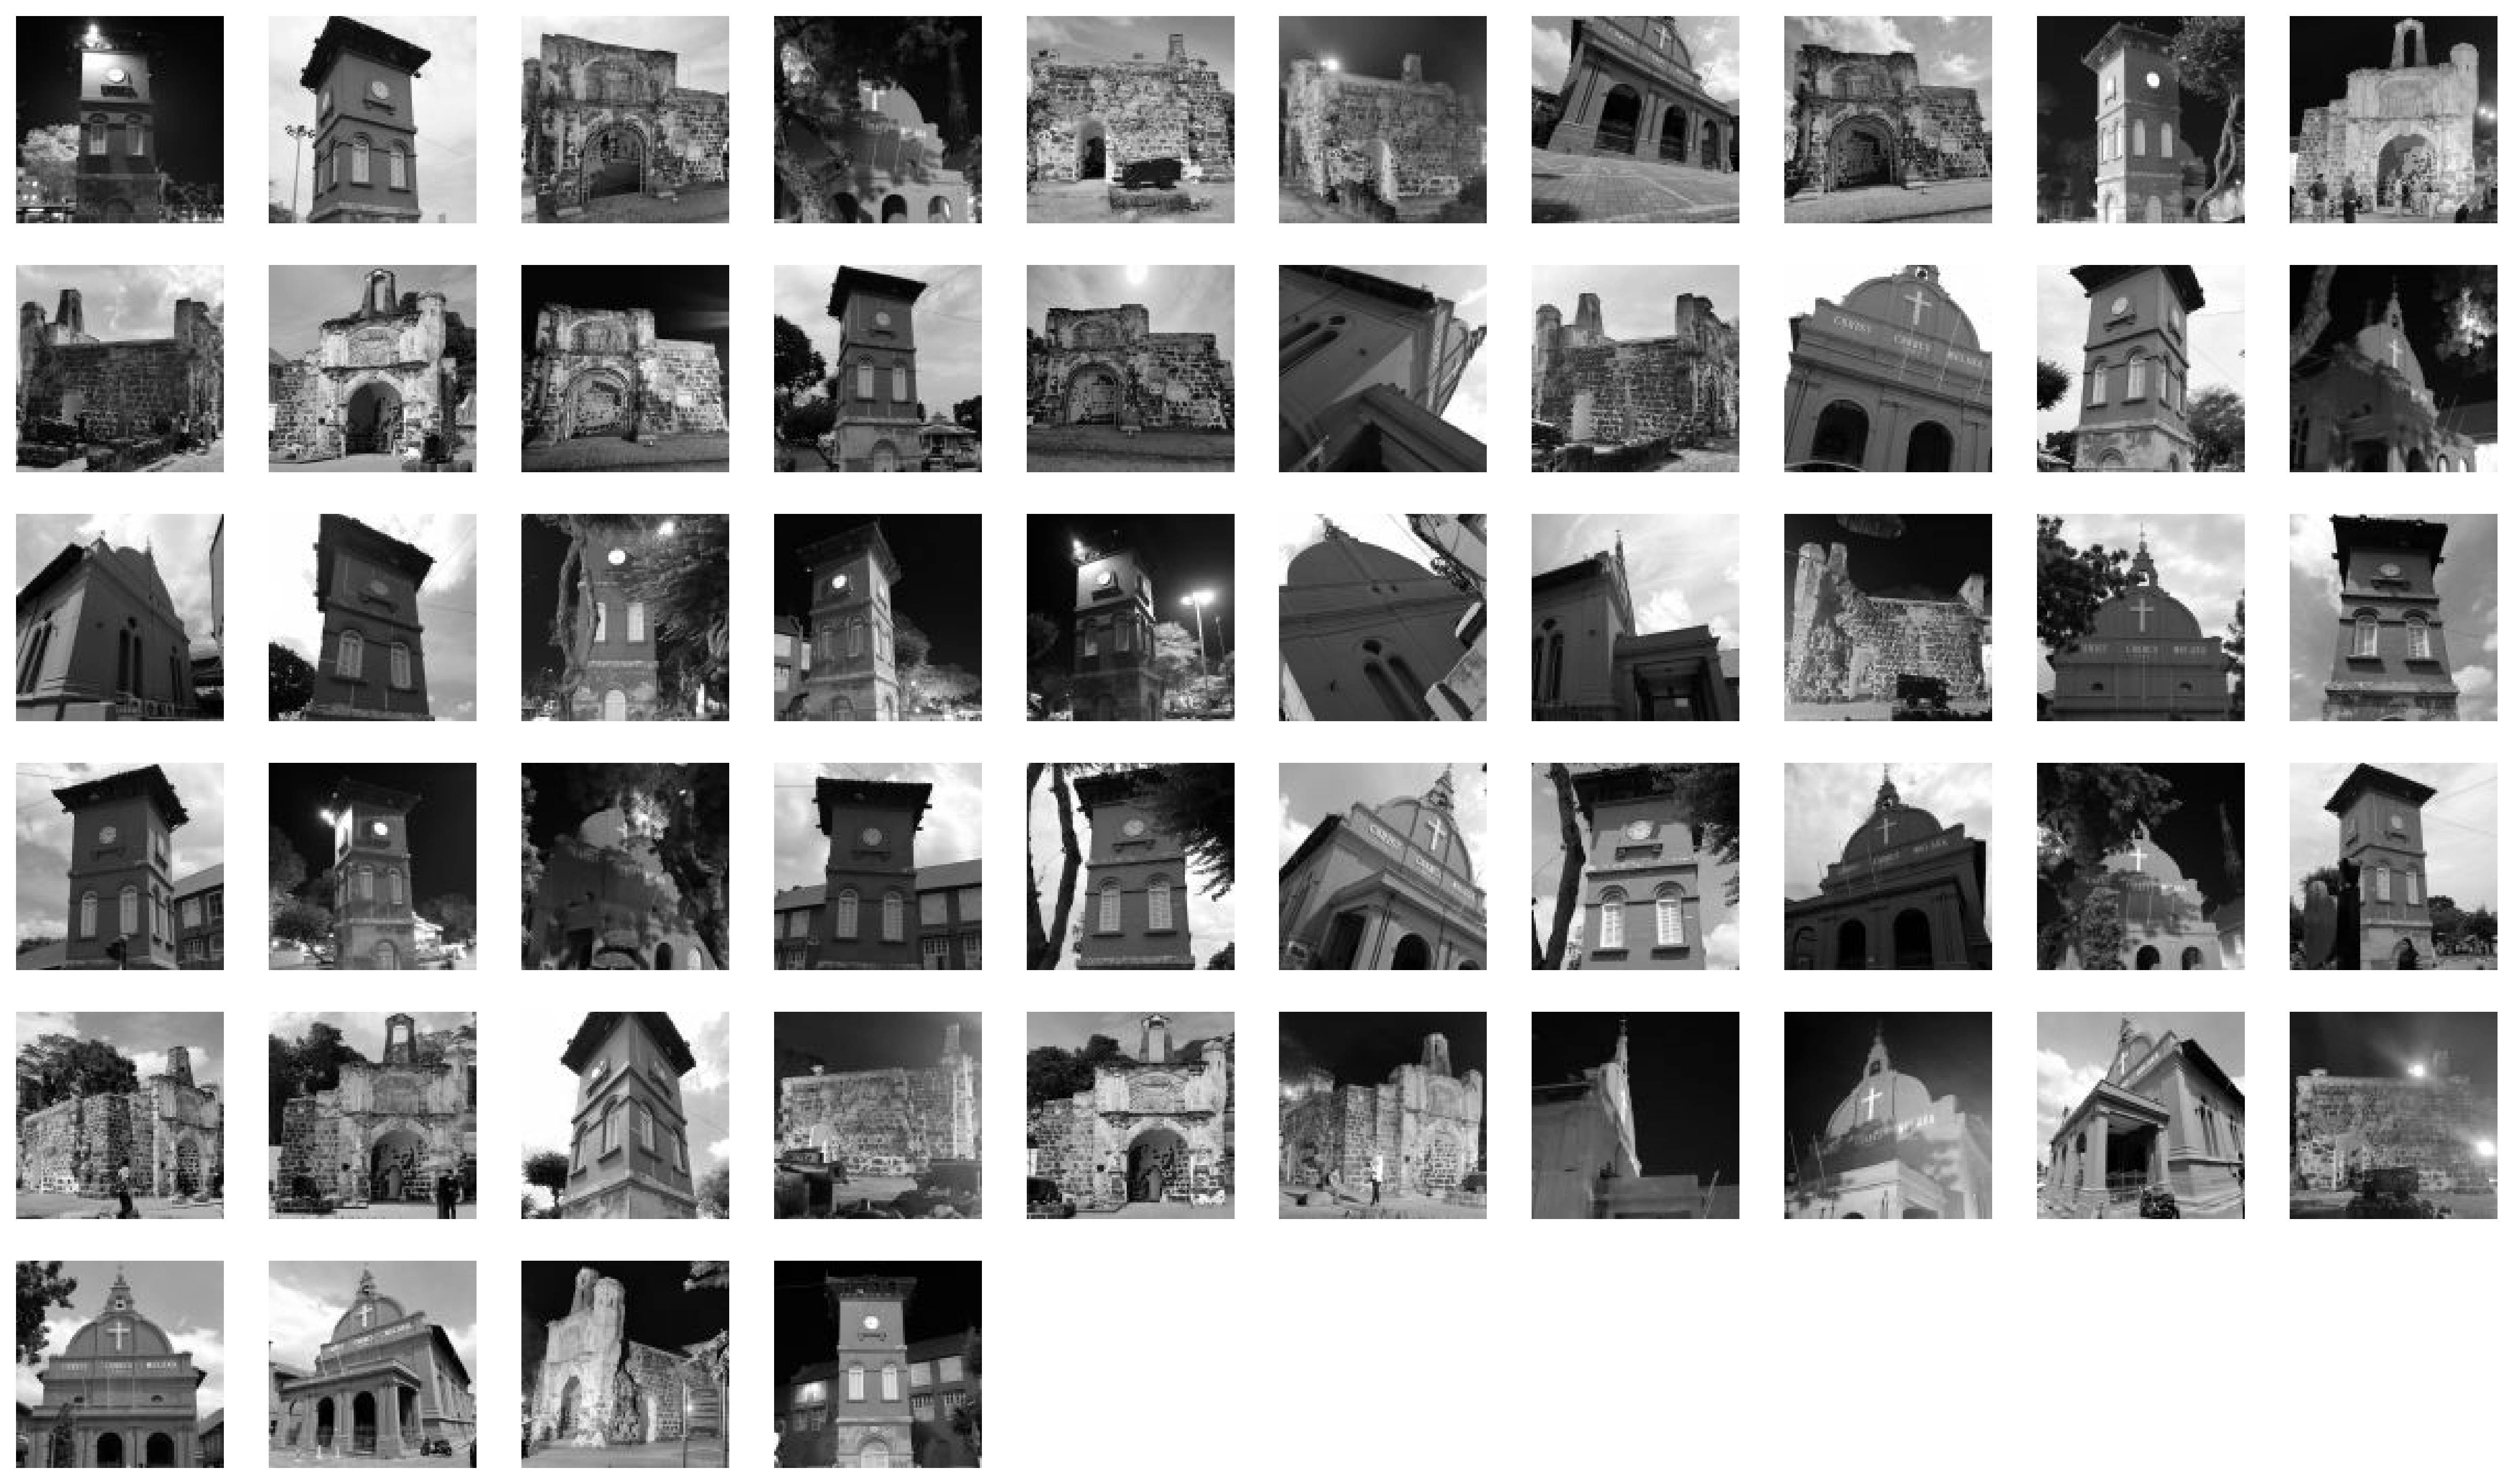

In [14]:
#show training images
image_grid(X_train, H, W)
plt.show()

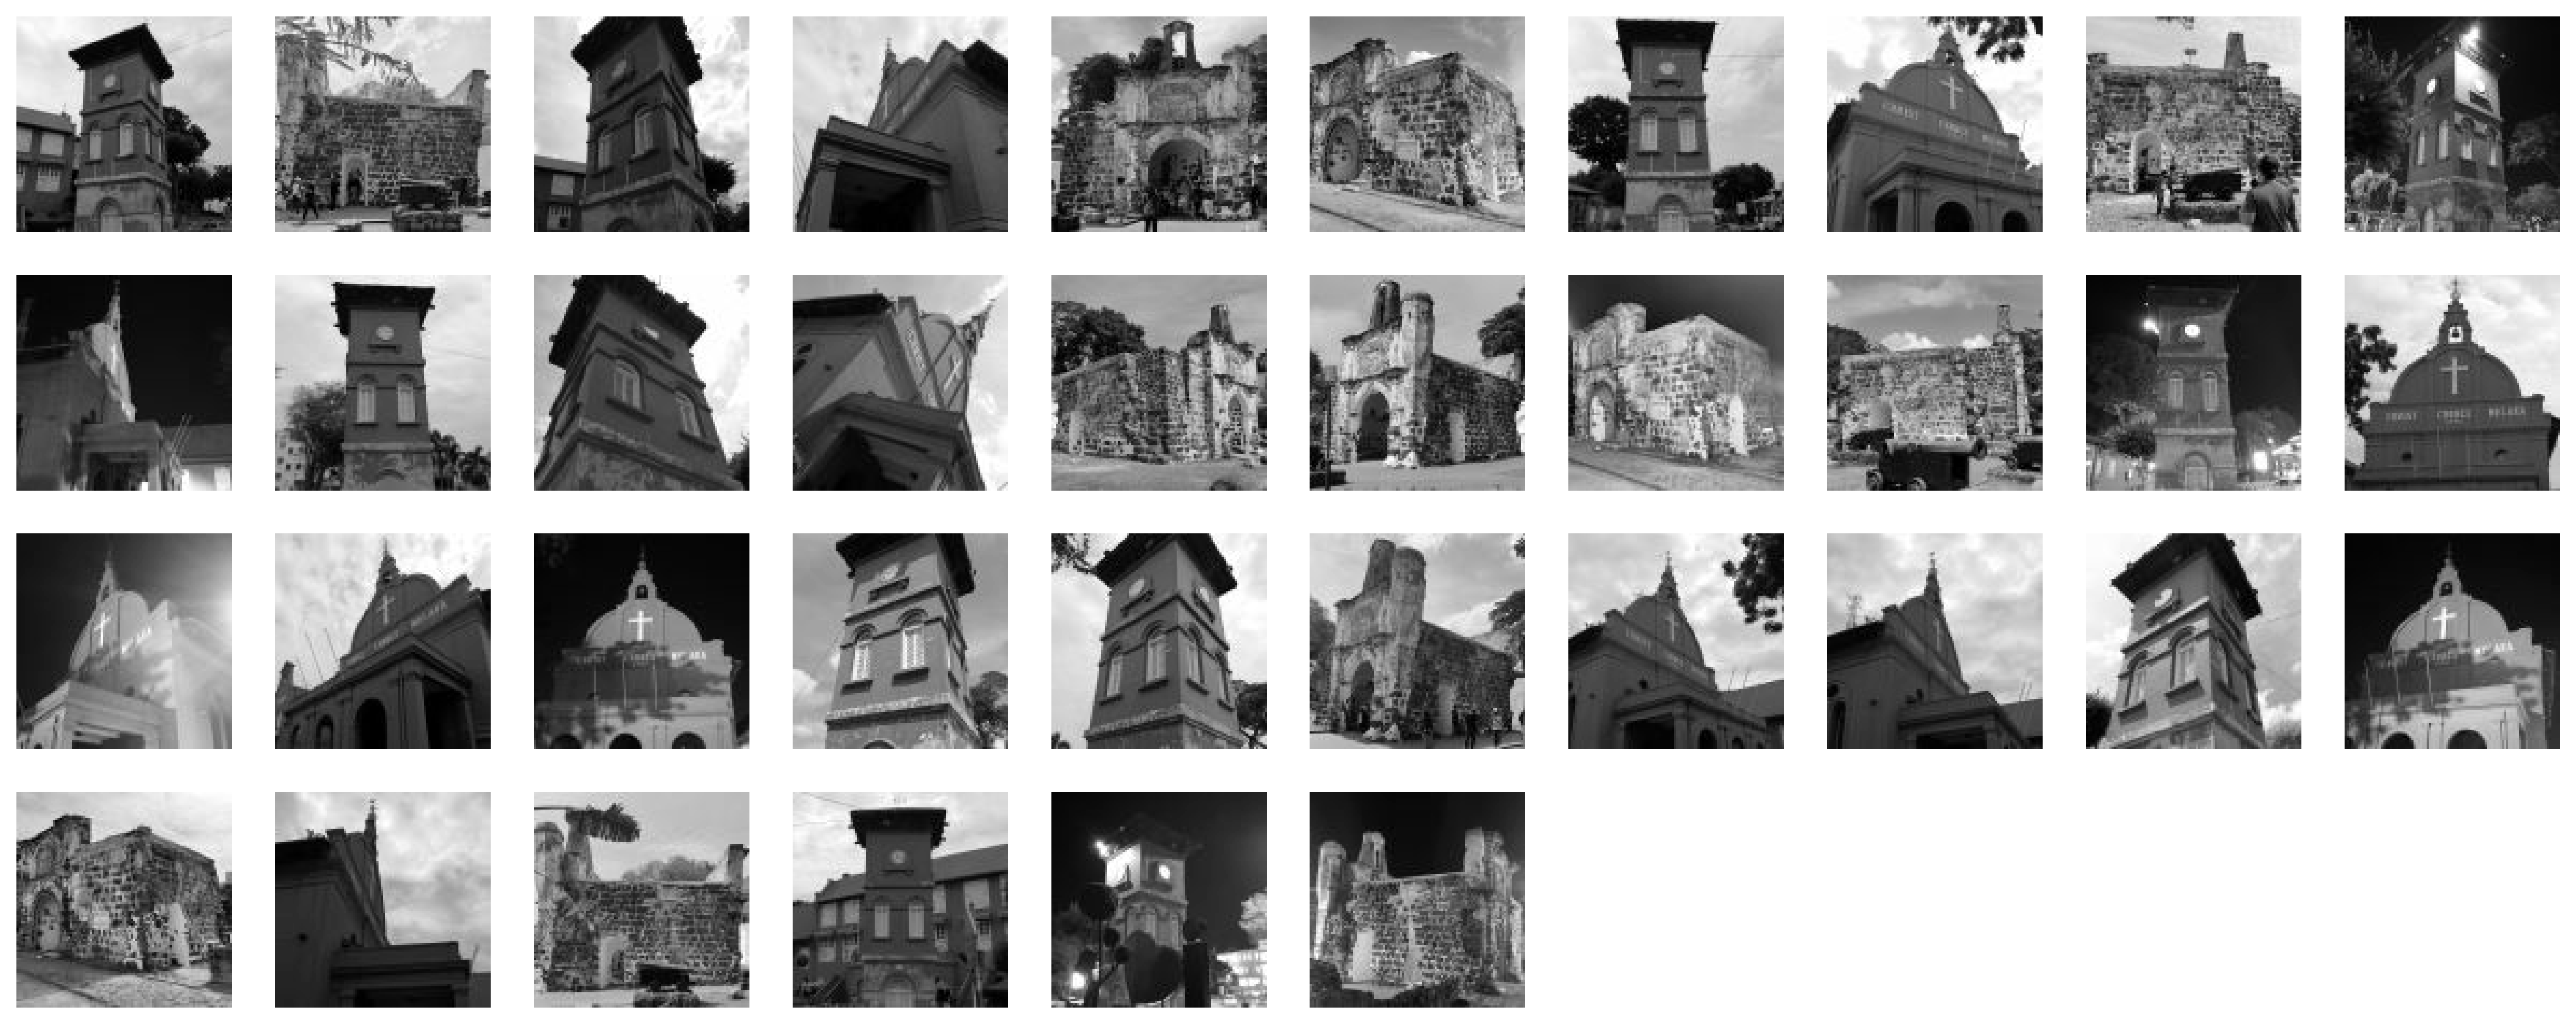

In [15]:
#Show testing images
image_grid(X_test, H, W)
plt.show()

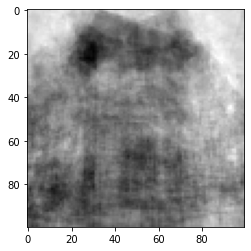

In [16]:
#Fine the mean_images
mean_image=np.mean(X_train, axis=0)

plt.imshow(np.reshape(mean_image,[H,W]), cmap = plt.get_cmap("gray"))
plt.show()

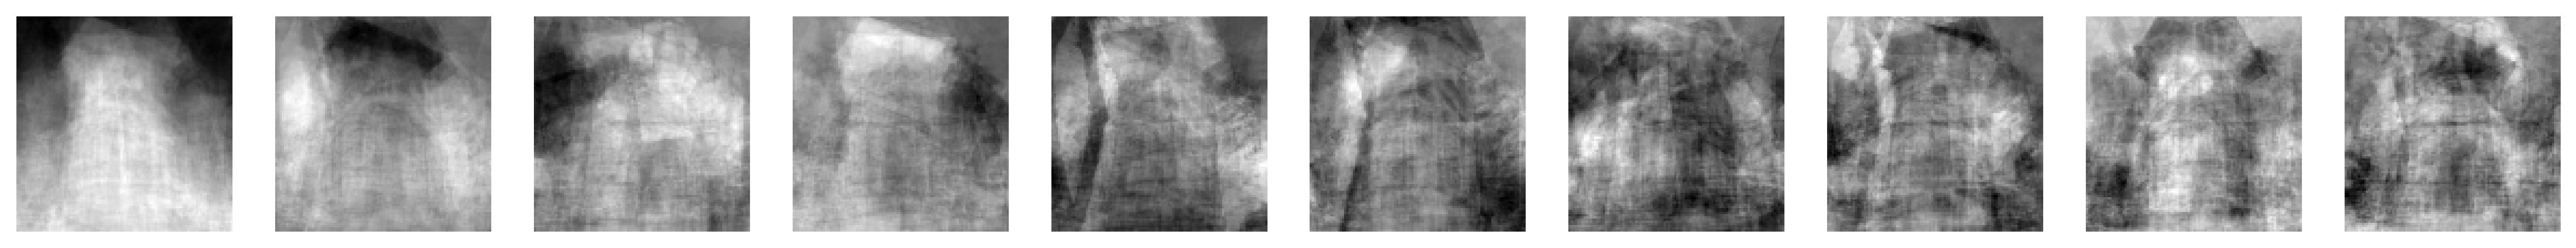

In [17]:
from sklearn.decomposition import PCA
n_components = 10

# Extracting the top 40 eigenfaces from the dataset
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

# Showing the eigenfaces
eigenfaces = pca.components_
image_grid(eigenfaces[:,:], H, W)
plt.show()

eigenfaces = eigenfaces.reshape((n_components, H, W))

In [18]:
# Projecting the input data on the eigenfaces orthonormal basis
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

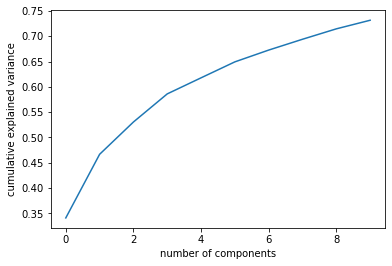

In [19]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [20]:
# Calculate distances

intra_class_dist = np.sum(np.power((X_train_pca[1,:] - X_test_pca[1,:]),2))
inter_class_dist = np.sum(np.power((X_train_pca[1,:] - X_test_pca[6,:]),2))
print("Intra-class distance: %d" % (intra_class_dist))
print("Inter-class distance: %d" % (inter_class_dist))

Intra-class distance: 25
Inter-class distance: 33


In [21]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes = (300, 100),
                   max_iter = 500,
                   verbose=1)

mlp.fit(X_train_pca,y_train)

pred = mlp.predict(X_test_pca)

Iteration 1, loss = 1.11065157
Iteration 2, loss = 1.05531118
Iteration 3, loss = 1.00447185
Iteration 4, loss = 0.95716023
Iteration 5, loss = 0.91254849
Iteration 6, loss = 0.87082146
Iteration 7, loss = 0.83167673
Iteration 8, loss = 0.79467393
Iteration 9, loss = 0.75911476
Iteration 10, loss = 0.72489578
Iteration 11, loss = 0.69201333
Iteration 12, loss = 0.66071960
Iteration 13, loss = 0.63102709
Iteration 14, loss = 0.60225841
Iteration 15, loss = 0.57449077
Iteration 16, loss = 0.54775570
Iteration 17, loss = 0.52205857
Iteration 18, loss = 0.49738731
Iteration 19, loss = 0.47363236
Iteration 20, loss = 0.45074063
Iteration 21, loss = 0.42883833
Iteration 22, loss = 0.40784764
Iteration 23, loss = 0.38774925
Iteration 24, loss = 0.36835711
Iteration 25, loss = 0.34951182
Iteration 26, loss = 0.33139701
Iteration 27, loss = 0.31397329
Iteration 28, loss = 0.29726034
Iteration 29, loss = 0.28116733
Iteration 30, loss = 0.26566329
Iteration 31, loss = 0.25084027
Iteration 32, los

In [22]:
score = mlp.score(X_test_pca, y_test)
print(score)

0.9166666666666666


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_pca, y_train)

pred = knn.predict(X_test_pca)

accuracy_score(y_test, pred)

0.8055555555555556

In [24]:
from sklearn import svm
from sklearn.metrics import accuracy_score
clf = svm.SVC(kernel='rbf', C = 1,gamma = 0.1)

# Fit the data to the model
clf.fit(X_train_pca, y_train)

pred=clf.predict(X_test_pca)

print(accuracy_score(pred,y_test))

0.9166666666666666


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred,labels=clf.classes_.tolist()))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.75      0.86        12
           3       0.80      1.00      0.89        12

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.93      0.92      0.92        36



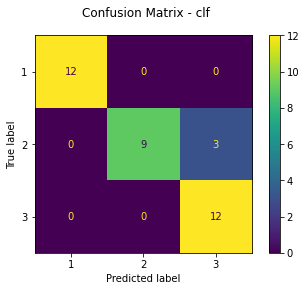

In [26]:
from sklearn.metrics import plot_confusion_matrix

fig = plot_confusion_matrix(clf, X_test_pca, y_test, display_labels=clf.classes_)
fig.figure_.suptitle("Confusion Matrix - clf")
plt.show()

In [30]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import Image
from PIL import ImageTk
import numpy as np
import pickle
import cv2
from sklearn.decomposition import PCA


classes = { 1:'A Famosa',
            2:'Stadhuys',      
            3:'Church',   }

top = tk.Tk()
top.geometry('500x400')
top.title('Historical Building Recognition')
top['bg'] = 'papaya whip'



def upload_image():
    file_path = filedialog.askopenfilename()
    uploaded = Image.open(file_path)
    uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
    im = ImageTk.PhotoImage(uploaded)
    sign_image.configure(image=im)
    sign_image.image = im
    show_classify_button(file_path)
    

def show_classify_button(file_path):
    predict_btn = Button(top, text="Predict", command = lambda: classify(file_path))
    predict_btn.configure(background ="deepskyblue",height="2", width="10",font=('Arial Black',10,'bold'))
    predict_btn.place(x=200, y=220)
    
def classify(file_path):
    image = Image.open(file_path)
    image = cv2.imread(file_path, 0)
    image = cv2.resize(image, (100, 100))
    image = np.array(image)
    image = image.reshape(1,10000)
    pca = PCA(n_components=10, svd_solver='randomized',
          whiten=True).fit(X_train)
    image = pca.transform(image)
    pred = clf.predict(image)[0]
    sign = classes[pred]
    print(sign)
    resulting(sign)
    
    
def resulting(sign):
    heading2.configure(text="This is "+sign,font=('Angsana New',16,'bold'))
    heading2.pack() 


heading = Label(top, text = "Historical Building Recognition", font=('DengXian', 18, 'bold'))
heading['bg'] = 'papaya whip'
heading.pack()

# Result heading
heading2 = Label(top,text="",pady=10, font=('Arial',12,'bold'))
heading2['bg'] = 'papaya whip'
heading2.pack()

upload = Button(top, text = "Browse image",command= upload_image)
upload.configure(background = 'tomato',height="2", width="20",font=('Arial Black', 14, 'bold'))
upload.place(x=125, y=300)


# Uploaded

sign_image = Label(top)
sign_image.pack(expand =True)
sign_image.place(x=200, y=100)
top.mainloop()